## COALESCENCE


#### POURQUOI LE TAUX EST DEFINI AINSI?


Dans cette partie j'essaie de comprendre déjà les outils qu'on utiliser tels que le taux de coalescence  $\lambda_{k,r}$( taux pour lequel r parmis k lignées coalescent ). Certains résultats sont admis car déjà vu dans le cours.

Considérons une population de taille $N$ constante. À chaque génération, des événements de reproduction de masse peuvent survenir : un individu peut engendrer une fraction $x_N$ de la population,c’est-à-dire environ $x_N N$ descendants. On suit rétrospectivement $k$ lignées dans la population. Un événement de reproduction d’un individu ayant engendré une proportion $x_N$ de la population :
- touche chaque lignée avec probabilité $x_N$
- donc la probabilité qu’un sous-ensemble donné de $r$ lignées soit affecté est $x_N^r(1-x_N)^{k-r}$
- si $r\ge2$, ces lignées fusionnent en une seule (coalescence $r$-aire).

Quand $N\to\infty$, on cherche une échelle temporelle telle que le processus limite ne disparaisse pas (taux nul) et ne diverge pas (taux infini). on veut que la mesure des coalescences possibles soit donnée par une mesure finie $\Lambda(dx)$ sur $[0,1]$ C’est-à-dire que le taux total de coalescences binaires (deux lignées qui se rejoignent via des événements de taille \(x\)) doit être :

$$\text{Taux binaire}= \int_0^1 \Lambda(dx)$$


Pour que cela soit vrai, on doit donc identifier :
$$x^2 f(x)\,dx = \Lambda(dx)$$

où $f(x)\,dx$ est la fréquence des événements de taille comprise entre $x$ et $x+dx$ et $x^2$ représente la probabilité que deux lignées soient toutes deux touchées par l’événement.


On en déduit le taux infinitésimal :
$$
\text{taux}_{k,r}(x)
= \frac{\Lambda(dx)}{x^{2}} \times x^{r}(1 - x)^{k - r}
= x^{\,r - 2}(1 - x)^{\,k - r}\,\Lambda(dx).
$$
Les événements peuvent avoir n’importe quelle taille 
 $x \in (0,1]$ , donc on intègre :
$$

\lambda_{k,r}
= \int_0^1 x^{\,r - 2}(1 - x)^{\,k - r}\,\Lambda(dx),
\qquad r \ge 2.

$$


### QUELQUES MESURES $\Lambda (dx)$

Maintenant qu'on connait une expresssion générale du taux de coalescence, appliquons ssur quelques mesures. On va chercher à trouver les génératrices infinitésimales et les matrices stochastiques.

#### KINGMAN

On part d'un échantillon de taille $n$. À l'instant $t$, l'état est une partition aléatoire
$\Pi_t$ de $\{1,\dots,n\}$, et $K_t := |\Pi_t|$ désigne le nombre de blocs.
Le processus est absorbant en $\{K_t=1\}$. La coalescence de Kingman correspond à la mesure
$$\Lambda = \delta_0$$
de sorte que seules les fusions $\emph{binaires}$ subsistent dans la limite. Dans la notation usuelle des $\Lambda$-coalescents, les taux de fusion satisfont alors
$$
\lambda_{k,2}=1, \qquad \lambda_{k,r}=0 \ \ \text{pour } r\ge 3.
$$

Le processus $K_t$ est une chaine de markov à temps continu $\emph{purement décroissante}$ sur $\{1,\dots,n\}$, avec transitions
$$
k \longrightarrow k-1 \quad \text{au taux} \quad \binom{k}{2}.
$$
Son générateur matriciel $Q=(Q_{k\ell})_{1\le k,\ell\le n}$ est
$$
\quad
Q_{k,k-1}=\binom{k}{2}, \qquad
Q_{k,k}=-\binom{k}{2}, \qquad
Q_{k,\ell}=0 \ \ (\ell\notin\{k,k-1\}),
\quad
$$
avec $Q_{1,1}=0$ (état absorbant).

Si $K_t=k\ge 2$, le temps jusqu'au prochain saut est exponentiel (Lemme des réveils)
$$
\Delta_k \sim \mathrm{Exp}\!\big(\binom{k}{2}\big),
$$
et au saut on a nécessairement $k\to k-1$. À partir de $K_0=n$, les temps d'attente successifs sont indépendants
$$
T_{\mathrm{MRCA}} \;=\; \sum_{k=2}^{n} \Delta_k
$$
où MRCA signifie Most Recent Common Ancestor. Par linéarité de l’espérance et $\mathbb{E}[\Delta_k] = 1/\lambda_k$, on a

$$\mathbb{E}[T_{\mathrm{MRCA}}]
= \sum_{k=2}^{n} \frac{1}{\lambda_k}
= \sum_{k=2}^{n} \frac{1}{\binom{k}{2}}$$

Or,

$$\frac{1}{\binom{k}{2}}
= \frac{1}{\tfrac{k(k-1)}{2}}
= \frac{2}{k(k-1)}
= 2\left(\frac{1}{k-1} - \frac{1}{k}\right)$$

ce qui permet une $\textbf{sommation télescopique} $:

$$\mathbb{E}[T_{\mathrm{MRCA}}]=\sum_{k=2}^{n}\frac{1}{\binom{k}{2}}
= 2\sum_{k=2}^{n}\left(\frac{1}{k-1} - \frac{1}{k}\right)
= 2\left(1 - \frac{1}{n}\right)
=2\left(1 - \frac{1}{n}\right)$$



In [57]:
import numpy as np
import matplotlib.pyplot as plt

npr=np.random

In [58]:
def simulate_kingman(n):
    k = n
    t = 0
    times = [t]
    Ks = [k]

    while k > 1:
        rate = k*(k-1)/2 
        dt =(-1/rate)*np.log(1-npr.rand())
        t += dt
        k -= 1
        times.append(t)
        Ks.append(k)
    
    return np.array(times), np.array(Ks)

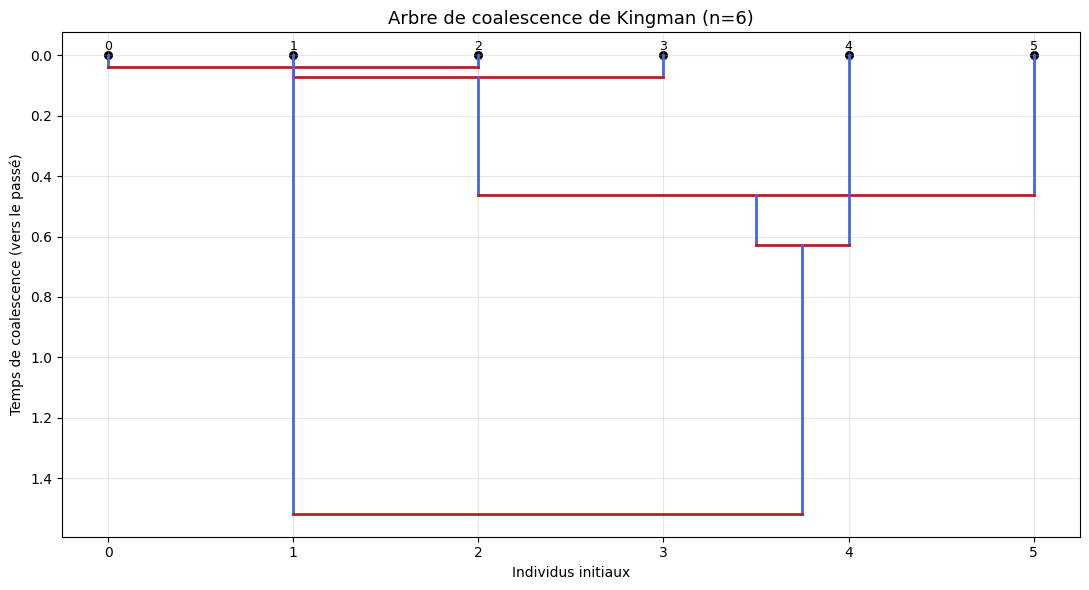

In [59]:

def simulate_kingman_tree(n, seed=None):

    rng = np.random.default_rng(seed)
    k = n
    t = 0.0

    active = [f"leaf_{i}" for i in range(n)]
    tree = []
    node_id = 0

    while k > 1:
        rate = k * (k - 1) / 2
        dt = rng.exponential(1.0 / rate)
        t += dt

        # Choisir 2 lignées au hasard à fusionner
        children = rng.choice(active, size=2, replace=False)
        parent = f"node_{node_id}"
        node_id += 1

        tree.append((parent, list(children), t))

        # Mise à jour
        active = [x for x in active if x not in children] + [parent]
        k = len(active)

    root = active[0]
    return tree, root


def plot_tree(tree, root, n, title="Arbre de coalescence"):
    positions = {f"leaf_{i}": (i, 0) for i in range(n)}

    def compute_positions(node):
        for parent, children, t in tree:
            if parent == node:
                xs = []
                for c in children:
                    if c not in positions:
                        compute_positions(c)
                    xs.append(positions[c][0])
                x_parent = np.mean(xs)
                positions[parent] = (x_parent, t)

    compute_positions(root)

    plt.figure(figsize=(11, 6))
    for parent, children, t in tree:
        x_parent, y_parent = positions[parent]
        xs = []
        for c in children:
            x_c, y_c = positions[c]
            xs.append(x_c)
            plt.plot([x_c, x_c], [y_c, t], color="royalblue", lw=2)
        plt.plot([min(xs), max(xs)], [t, t], color="firebrick", lw=2)

    # --- Feuilles ---
    for i in range(n):
        plt.scatter(i, 0, color="black", s=30)
        plt.text(i, -0.05, f"{i}", ha="center", va="top", fontsize=9)

    plt.title(title, fontsize=13)
    plt.xlabel("Individus initiaux")
    plt.ylabel("Temps de coalescence (vers le passé)")
    plt.gca().invert_yaxis()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


# ==============================================================
# 3️⃣ Exécution : n = 10
# ==============================================================

n = 6
tree, root = simulate_kingman_tree(n, seed=123)
plot_tree(tree, root, n, title=f"Arbre de coalescence de Kingman (n={n})")


####  Bolthausen-Sznitman

Pour la coalescence uniforme (i.e. $\Lambda$ uniforme sur $[0,1]$), en intégrant sur $x\in[0,1]$, on obtient :

$$\lambda_{k,r} = \int_0^1 x^{r-2}(1-x)^{k-r}\,dx
= B(r-1,\,k-r+1)
= \frac{\Gamma(r-1)\,\Gamma(k-r+1)}{\Gamma(k)}$$

En utilisant les identités $\Gamma(r-1) = (r-2)!$ et $\Gamma(k) = (k-1)!$, cela donne :
$$
\lambda_{k,r} = \frac{(r-2)!\,(k-r)!}{(k-1)!}, \qquad 2\le r\le k.
$$
Lorsque $K_t=k\ge2$, une fusion $r$-aire (i.e. $k\to k-r+1$) survient au taux
$$
\begin{aligned}
Q_{k,\,k-r+1}
&= \binom{k}{r}\,\lambda_{k,r}
= \binom{k}{r}\,\frac{(r-2)!\,(k-r)!}{(k-1)!} \\[4pt]
&= \frac{k!}{r!\,(k-r)!}\,\frac{(r-2)!\,(k-r)!}{(k-1)!} \\[4pt]
&= \frac{k!}{(k-1)!}\,\frac{(r-2)!}{r!} \\[4pt]
&= k \cdot \frac{(r-2)!}{r(r-1)(r-2)!}
= \frac{k}{r(r-1)}.
\end{aligned}
$$

et le taux total de sortie de l'état $k$ vaut

$$\lambda_k \;=\; \sum_{r=2}^{k}\frac{k}{r(r-1)}
\;=\; k\sum_{r=2}^{k}\Big(\frac{1}{r-1}-\frac{1}{r}\Big)
\;=\; k-1.$$

Le générateur infinitésimal du processus $K_t$ est donc

$$Q_{k,k} = -(k-1), \qquad Q_{k,\,k-r+1} = \frac{k}{r(r-1)}\quad (r=2,\dots,k), \qquad Q_{1,1}=0$$



Soit $T_k$ le temps d'absorption (atteindre l'état $1$) en partant de $k$ lignées, et
$m(k):=\mathbb{E}[T_k]$ son espérance.
Lorsque $K_t=k\ge2$:

$$\text{(i) } \quad \Delta_k^{(\mathrm{next})} \sim \mathrm{Exp}(k-1),
\qquad
\text{(ii) } \quad \mathbb{P}(R=r\mid K_{t^-}=k)=\frac{Q_{k,k-r+1}}{\lambda_k}
=\frac{\frac{k}{r(r-1)}}{k-1}=\frac{k}{k-1}\cdot\frac{1}{r(r-1)}$$

pour $r=2,\dots,k$. Au saut, on passe de $k$ à $k-r+1$ (fusion $r$-aire).
Conditionnons par le premier saut à partir de $k$ :
$$
T_k \;\overset{d}{=}\; \Delta_k^{(\mathrm{next})} \;+\; T_{\,k-R+1}'$$
où $T_{\,k-R+1}'$ est une copie indépendante de $T_{\,k-R+1}$ et $R$ suit la loi ci-dessus.
En prenant l'espérance et en utilisant $\mathbb{E}[\Delta_k^{(\mathrm{next})}]=\frac{1}{k-1}$, on obtient
$$
m(1)=0,\qquad
m(k)=\frac{1}{k-1}+\sum_{r=2}^{k}\mathbb{P}(R=r\mid k)\; m(k-r+1),\qquad k\ge2,
$$
soit encore
$$
m(k) \;=\; \frac{1}{k-1} \;+\; \sum_{r=2}^{k} \frac{k}{(k-1)\,r(r-1)}\, m(k-r+1),
\qquad m(1)=0,\quad k\ge2
$$
Posons $j:=k-r+1$ (donc $j=1,\dots,k-1$ et $r=k-j+1$). Alors
$$
\frac{1}{r(r-1)}=\frac{1}{(k-j+1)(k-j)}$$
et la récurrence s'écrit
$$
\boxed{
m(k) \;=\; \frac{1}{k-1}
\;+\; \frac{k}{k-1}\sum_{j=1}^{k-1} \frac{m(j)}{(k-j+1)(k-j)}\,,\qquad k\ge2.}$$

Soit $m_T:=(m(2),m(3),\dots,m(n))^\top$ et $Q_T$ la sous-matrice transitoire du générateur
$Q$ ,c’est-à-dire la partie de $Q$ restreinte aux états non absorbants(états $\{2,\dots,n\}$).
Par les équations de Kolmogorov avant, $m_T$ satisfait le système linéaire

$$\quad -\,Q_T\,m_T=\mathbf{1}, \quad\text{i.e.}\quad m_T = (-Q_T)^{-1}\mathbf{1}. \quad $$

Dans le modèle uniforme, $Q_{k,k}=-(k-1)$, et pour $r=2,\dots,k$ :
$Q_{k,\,k-r+1}=\dfrac{k}{r(r-1)}$; toutes les autres entrées (hors diagonale) sont nulles.



- La récurrence fournit une procédure constructive pour $m(k)$, et la forme $(-Q_T)^{-1}\mathbf{1}$ donne l'équivalent matriciel.
- On obtient immédiatement la borne simple $m(k)\le \sum_{j=2}^{k}\frac{1}{j-1}=H_{k-1}$,car après chaque saut $K$ diminue d'au moins $1$ et $\mathbb{E}[\Delta_k]=1/(k-1)$.
- Les temps moyens $m(k)$ croissent modérément et sont nettement plus faibles que sous Kingman, du fait des fusions multiples (sauts de taille $r\ge2$ possibles).



In [60]:
def simulate_uniform_coalescent(n):
    k=n
    t = 0
    times = [t]
    Ks = [n]
    rng = np.random.default_rng()

    while k > 1:
        rate = k - 1

        dt = rng.exponential(1/ rate)
        t += dt

        # distribution de la taille r de la fusion
        r_vals = np.arange(2, k + 1)
        probs = (k / (k - 1)) / (r_vals * (r_vals - 1))
        probs /= probs.sum()  # normalisation

        # tirage de r
        r = rng.choice(r_vals, p=probs)

        # nouvelle valeur de K
        k = k - r + 1

        # enregistrement
        times.append(t)
        Ks.append(k)

    return np.array(times), np.array(Ks)


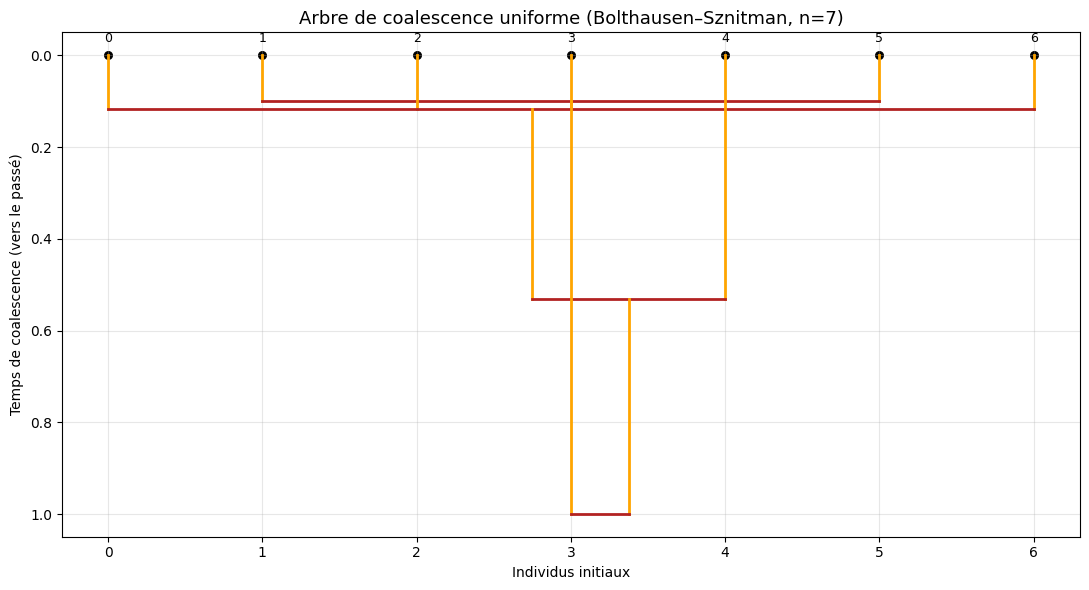

In [61]:

def simulate_uniform_tree(n, seed=None):
    rng = np.random.default_rng(seed)
    k = n
    t = 0.0

    # lignées actives au départ (les feuilles)
    active = [f"leaf_{i}" for i in range(n)]
    tree = []   # liste des (parent, enfants, temps)
    node_id = 0

    while k > 1:
        # taux total = k - 1
        rate = k - 1
        dt = rng.exponential(1.0 / rate)
        t += dt

        # distribution de probabilité pour le nombre de lignées fusionnées
        r_vals = np.arange(2, k + 1)
        probs = (k / (k - 1)) / (r_vals * (r_vals - 1))
        probs /= probs.sum()
        r = rng.choice(r_vals, p=probs)

        # sélection des lignées à fusionner
        children = rng.choice(active, size=r, replace=False)
        parent = f"node_{node_id}"
        node_id += 1

        # enregistrement de la fusion
        tree.append((parent, list(children), t))

        # mise à jour de la liste active
        active = [x for x in active if x not in children] + [parent]
        k = len(active)

    # la racine finale (MRCA)
    root = active[0]
    return tree, root

def plot_tree(tree, root, n):
    # position horizontale des feuilles
    positions = {f"leaf_{i}": (i, 0) for i in range(n)}

    def compute_positions(node):
        """Calcule récursivement la position horizontale moyenne des enfants."""
        for parent, children, t in tree:
            if parent == node:
                xs = []
                for c in children:
                    if c not in positions:
                        compute_positions(c)
                    xs.append(positions[c][0])
                x_parent = np.mean(xs)
                positions[parent] = (x_parent, t)

    compute_positions(root)

    # --- Dessin ---
    plt.figure(figsize=(11, 6))

    for parent, children, t in tree:
        x_parent, y_parent = positions[parent]
        xs = []
        for c in children:
            x_c, y_c = positions[c]
            xs.append(x_c)
            # lignes verticales (chaque lignée)
            plt.plot([x_c, x_c], [y_c, t], color="orange", lw=2)
        # barre horizontale reliant les enfants
        plt.plot([min(xs), max(xs)], [t, t], color="firebrick", lw=2)

    # --- Feuilles ---
    for i in range(n):
        plt.scatter(i, 0, color="black", s=30)
        plt.text(i, -0.05, f"{i}", ha="center", va="top", fontsize=9)

    # --- Style général ---
    plt.title(f"Arbre de coalescence uniforme (Bolthausen–Sznitman, n={n})", fontsize=13)
    plt.xlabel("Individus initiaux")
    plt.ylabel("Temps de coalescence (vers le passé)")
    plt.gca().invert_yaxis()  # Le passé est vers le haut
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


# ==============================================================
# 3️⃣ Exécution : 10 individus (10 feuilles)
# ==============================================================

n = 7
tree, root = simulate_uniform_tree(n, seed=123)
plot_tree(tree, root, n)


#### $Beta(2-\alpha,\alpha)$


La mesure $\Lambda$ est donnée par une loi Beta $(2-\alpha,\alpha)$ sur $[0,1]$ :

$$\Lambda(dx)
= \frac{1}{B(2-\alpha,\alpha)}\,x^{1-\alpha}(1-x)^{\alpha-1}\,dx,
\qquad 1<\alpha<2$$

où $B(a,b)=\dfrac{\Gamma(a)\Gamma(b)}{\Gamma(a+b)}$ est la fonction Beta d’Euler.

Pour un $\Lambda$-coalescent général, le taux auquel $r$ lignées
(parmi $k$ existantes) fusionnent en une seule est :

$$\lambda_{k,r} = \int_0^1 x^{r-2}(1-x)^{k-r}\,\Lambda(dx)$$

En substituant la mesure Beta $(2-\alpha,\alpha)$, on obtient :

$$\begin{aligned}
\lambda_{k,r}
&= \frac{1}{B(2-\alpha,\alpha)} \int_0^1
x^{r-2+1-\alpha}(1-x)^{k-r+\alpha-1}\,dx \\[4pt]
&= \frac{B(r-\alpha,\,k-r+\alpha)}{B(2-\alpha,\,\alpha)} \\[6pt]
&= \frac{\Gamma(r-\alpha)\,\Gamma(k-r+\alpha)}{\Gamma(k)\,\Gamma(2-\alpha)\,\Gamma(\alpha)}.
\end{aligned}
$$
Cette quantité est bien définie pour $r>\alpha$ (donc $r\ge2$ puisque $\alpha<2$).

Depuis un état $k$, une fusion $r$-aire (passage $k\to k-r+1$)
se produit au taux :

$$Q_{k,\,k-r+1} = \binom{k}{r}\,\lambda_{k,r}$$

En remplaçant $\lambda_{k,r}$ :

$$
Q_{k,\,k-r+1}
= \binom{k}{r}\,
\frac{B(r-\alpha,\,k-r+\alpha)}{B(2-\alpha,\,\alpha)},
\qquad r=2,\dots,k.
$$

Le taux total auquel l’état $k$ est quitté est :
$$
\lambda_k = \sum_{r=2}^{k} Q_{k,\,k-r+1}
= \frac{1}{B(2-\alpha,\alpha)} \sum_{r=2}^{k}
\binom{k}{r}\,B(r-\alpha,\,k-r+\alpha).
$$
Ce terme n’admet pas, en général, de forme fermée simple, mais son comportement asymptotique
pour $k$ grand est bien connu :
$$
\lambda_k \sim C_\alpha\,k^{\alpha},
\qquad C_\alpha = \frac{\Gamma(2-\alpha)}{\alpha(\alpha-1)\,B(2-\alpha,\alpha)}.
$$
Ainsi, contrairement à Kingman ($\lambda_k\propto k^2$)
ou à Bolthausen-Sznitman ($\lambda_k\propto k$),
le taux de coalescence croît comme puissance intermédiaire $k^{\alpha}$.

On peut alors écrire le générateur sur $\{1,\dots,n\}$ :
$$
Q_{k,k} = -\lambda_k, \qquad
Q_{k,\,k-r+1} = \binom{k}{r}\,
\frac{B(r-\alpha,\,k-r+\alpha)}{B(2-\alpha,\,\alpha)},\qquad
Q_{1,1}=0.
$$

L’état $1$ étant absorbant ($Q_{1,j}=0$ pour tout $j$), on définit
la sous-matrice transitoire $Q_T$ en restreignant $Q$
aux états $\{2,\dots,n\}$ :
$$
Q_T = (\,Q_{ij}\,)_{i,j=2,\dots,n}.
$$
C’est cette sous-matrice qui intervient dans les équations
pour les temps d’absorption :
$$
-\,Q_T\,m_T = \mathbf{1},
\qquad m_T = (-Q_T)^{-1}\mathbf{1},
$$
où $m_T=(m(2),m(3),\dots,m(n))^\top$ contient les espérances des temps
jusqu’à l’absorption (MRCA) à partir de chaque $k$.


Le temps total jusqu’à coalescence complète est
$$
T_{\mathrm{MRCA}} = \sum_{k=2}^{n}\Delta_k, \qquad
\mathbb{E}[\Delta_k] = \frac{1}{\lambda_k}.
$$
Pour $n$ grand, en utilisant $\lambda_k\sim C_\alpha k^{\alpha}$, on obtient
$$
\mathbb{E}[T_{\mathrm{MRCA}}]
\approx \sum_{k=2}^{n}\frac{1}{C_\alpha k^{\alpha}}
\sim
\begin{cases}
\dfrac{1}{C_\alpha(\alpha-1)} & \text{si }\alpha>1,\\[4pt]
\text{diverge logarithmiquement} & \text{si }\alpha\to1.
\end{cases}
$$
Ainsi, le temps de coalescence diminue lorsque $\alpha$ décroît vers $1$
(plus de fusions multiples, coalescence plus rapide).


In [62]:
from scipy.special import beta, gamma
from math import *

def beta_coalescent_trajectory(n, alpha, seed=None):
    if not (1 < alpha < 2):
        raise ValueError("alpha doit être dans (1, 2).")

    rng = npr.default_rng(seed)
    k = n
    t = 0.0
    times = [t]
    Ks = [k]

    # constante de normalisation C_alpha (asymptotique)
    C_alpha = gamma(2 - alpha) / (alpha * (alpha - 1) * beta(2 - alpha, alpha))

    while k > 1:
        # taux total (asymptotique)
        rate = C_alpha * (k ** alpha)
        dt = rng.exponential(1/ rate)
        t += dt

        # probabilités exactes de fusion r-aire
        r_vals = np.arange(2, k + 1)
        weights = np.array([
            comb(k, r) * beta(r - alpha, k - r + alpha)
            for r in r_vals
        ])
        probs = weights / weights.sum()

        # tirage du nombre de lignées fusionnées
        r = rng.choice(r_vals, p=probs)
        k = k - r + 1

        times.append(t)
        Ks.append(k)

    return np.array(times), np.array(Ks)


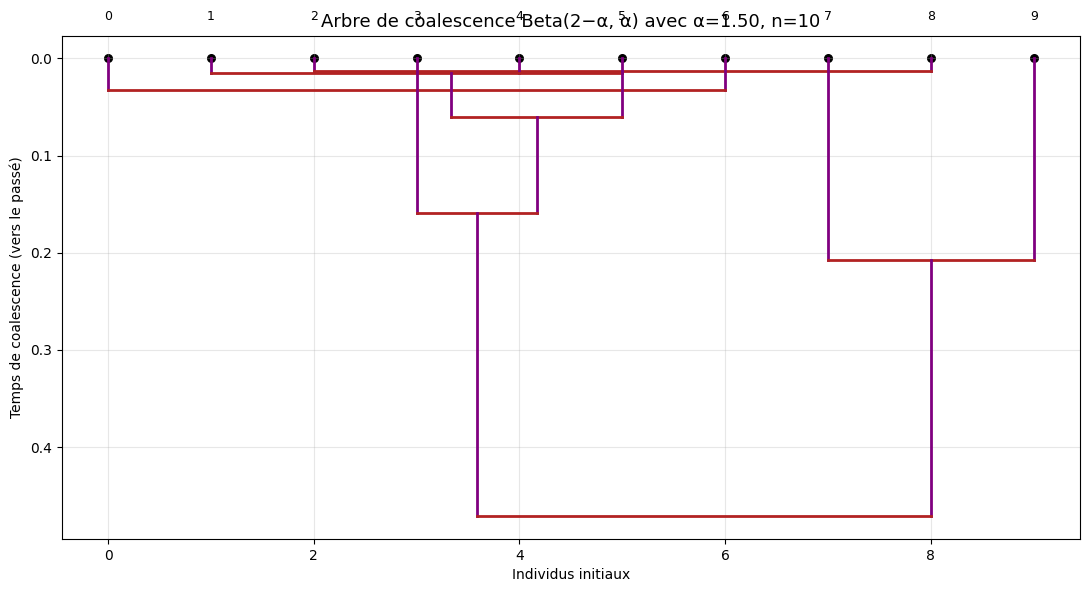

In [63]:


def simulate_beta_tree(n, alpha=1.5, seed=None):
    if not (1 < alpha < 2):
        raise ValueError("α doit être dans (1, 2).")

    rng = np.random.default_rng(seed)
    k = n
    t = 0.0

    active = [f"leaf_{i}" for i in range(n)]
    tree = []
    node_id = 0

    while k > 1:
        # Taux total asymptotique : Λ_k ≈ C_α k^α
        C_alpha = gamma(2 - alpha) / (alpha * (alpha - 1) * beta(2 - alpha, alpha))
        rate = C_alpha * (k ** alpha)
        dt = rng.exponential(1.0 / rate)
        t += dt

        # Distribution exacte du nombre de lignées fusionnées
        r_vals = np.arange(2, k + 1)
        weights = np.array([
            comb(k, r) * beta(r - alpha, k - r + alpha)
            for r in r_vals
        ])
        probs = weights / weights.sum()
        r = rng.choice(r_vals, p=probs)

        # Sélection aléatoire des lignées fusionnées
        children = rng.choice(active, size=r, replace=False)
        parent = f"node_{node_id}"
        node_id += 1

        tree.append((parent, list(children), t))

        # Mise à jour
        active = [x for x in active if x not in children] + [parent]
        k = len(active)

    root = active[0]
    return tree, root


# ==============================================================
# 2️⃣ Fonction de dessin (identique aux précédentes)
# ==============================================================

def plot_tree(tree, root, n, alpha=1.5):
    positions = {f"leaf_{i}": (i, 0) for i in range(n)}

    def compute_positions(node):
        for parent, children, t in tree:
            if parent == node:
                xs = []
                for c in children:
                    if c not in positions:
                        compute_positions(c)
                    xs.append(positions[c][0])
                x_parent = np.mean(xs)
                positions[parent] = (x_parent, t)

    compute_positions(root)

    # --- Dessin ---
    plt.figure(figsize=(11, 6))
    for parent, children, t in tree:
        x_parent, y_parent = positions[parent]
        xs = []
        for c in children:
            x_c, y_c = positions[c]
            xs.append(x_c)
            plt.plot([x_c, x_c], [y_c, t], color="purple", lw=2)
        plt.plot([min(xs), max(xs)], [t, t], color="firebrick", lw=2)

    # --- Feuilles ---
    for i in range(n):
        plt.scatter(i, 0, color="black", s=30)
        plt.text(i, -0.05, f"{i}", ha="center", va="top", fontsize=9)

    plt.title(f"Arbre de coalescence Beta(2−α, α) avec α={alpha:.2f}, n={n}", fontsize=13)
    plt.xlabel("Individus initiaux")
    plt.ylabel("Temps de coalescence (vers le passé)")
    plt.gca().invert_yaxis()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


# ==============================================================
# 3️⃣ Exécution : n = 10, α = 1.5
# ==============================================================

n = 10
alpha = 1.5
tree, root = simulate_beta_tree(n, alpha=alpha, seed=123)
plot_tree(tree, root, n, alpha=alpha)


##### Les trajectoires pour n=50

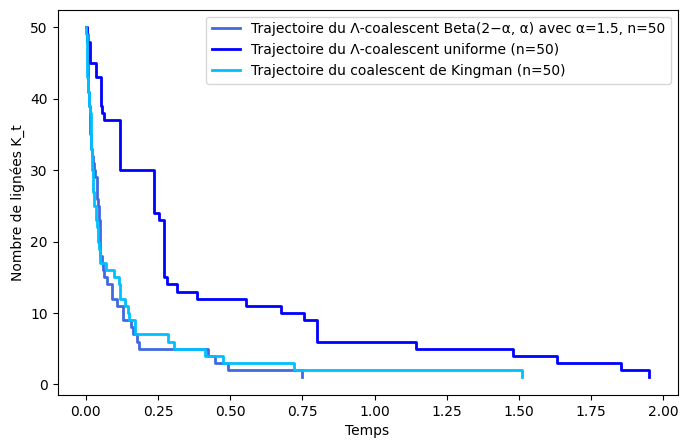

In [64]:
alpha = 1.5 
n = 50
np.random.seed(42)

t_k, K_k = simulate_kingman(n)
t_u, K_u = simulate_uniform_coalescent(n)
t_b, K_b = beta_coalescent_trajectory(n, alpha, seed=42)


plt.figure(figsize=(8, 5))
plt.step(t_b, K_b, where="post", linewidth=2, color="royalblue",label=f"Trajectoire du Λ-coalescent Beta(2−α, α) avec α={alpha}, n={n}")
plt.step(t_u, K_u, where='post', linewidth=2, color='blue',label=f"Trajectoire du Λ-coalescent uniforme (n={n})")
plt.step(t_k, K_k, where='post', linewidth=2,color="deepskyblue",label=f"Trajectoire du coalescent de Kingman (n={n})")
plt.xlabel("Temps")
plt.ylabel("Nombre de lignées K_t")
plt.legend()
plt.show()


#### La moyenne des temps jusqu'au MRCA

=== Moyennes du temps jusqu’au MRCA ===
Kingman:              1.8718
Uniforme (B–S):       2.0717
Beta(2−α, α), α=1.1000001: 0.1552


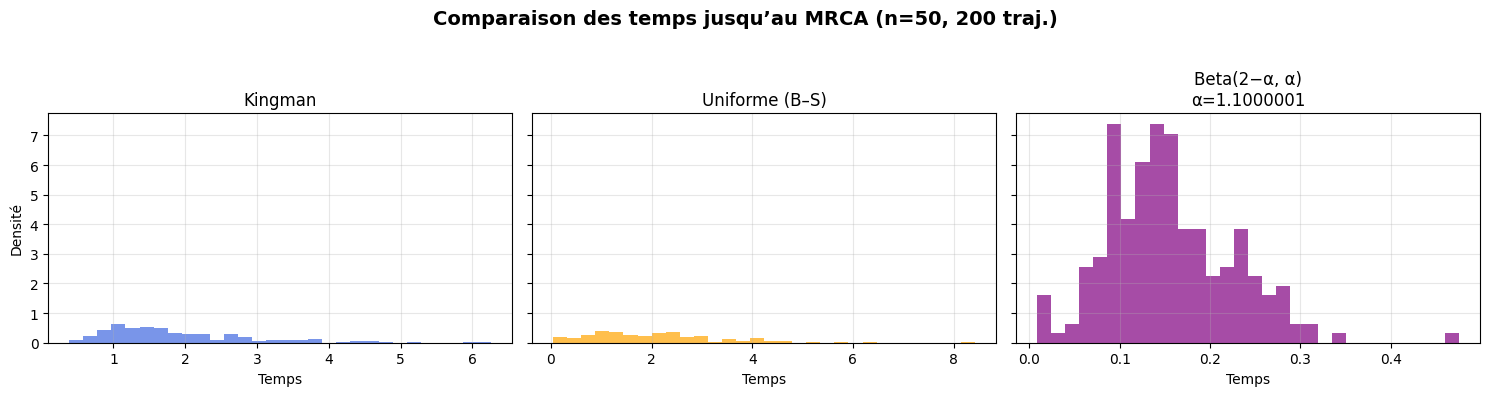

In [65]:
def compare_mr_ca(n=50, nrep=1000, alpha=1.5, seed=42):
    rng = np.random.default_rng(seed)
    T_kingman, T_uniform, T_beta = [], [], []

    for _ in range(nrep):
        t_k, _ = simulate_kingman(n)
        t_u, _ = simulate_uniform_coalescent(n)
        t_b, _ = beta_coalescent_trajectory(n, alpha)

        T_kingman.append(t_k[-1])
        T_uniform.append(t_u[-1])
        T_beta.append(t_b[-1])

    print("=== Moyennes du temps jusqu’au MRCA ===")
    print(f"Kingman:              {np.mean(T_kingman):.4f}")
    print(f"Uniforme (B–S):       {np.mean(T_uniform):.4f}")
    print(f"Beta(2−α, α), α={alpha}: {np.mean(T_beta):.4f}")

  
    fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
    plt.suptitle(f"Comparaison des temps jusqu’au MRCA (n={n}, {nrep} traj.)", fontsize=14, fontweight='bold')


    axes[0].hist(T_kingman, bins=30, color='royalblue', alpha=0.7, density=True)
    axes[0].set_title("Kingman", fontsize=12)
    axes[0].set_xlabel("Temps")
    axes[0].set_ylabel("Densité")
    axes[0].grid(alpha=0.3)
    axes[1].hist(T_uniform, bins=30, color='orange', alpha=0.7, density=True)
    axes[1].set_title("Uniforme (B–S)", fontsize=12)
    axes[1].set_xlabel("Temps")
    axes[1].grid(alpha=0.3)

    # --- Beta(2−α, α) ---
    axes[2].hist(T_beta, bins=30, color='purple', alpha=0.7, density=True)
    axes[2].set_title(f"Beta(2−α, α)\nα={alpha}", fontsize=12)
    axes[2].set_xlabel("Temps")
    axes[2].grid(alpha=0.3)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


compare_mr_ca(n=50, nrep=200, alpha=1.1000001, seed=42)
